In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Создание клиента

In [3]:
from dask.distributed import Client

In [4]:
client = Client(n_workers = 4, threads_per_worker = 4, processes = True, memory_limit = '2GB')

In [5]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56668,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:56691,Total threads: 4
Dashboard: http://127.0.0.1:56697/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:56671,


### Dask array

In [6]:
import dask.array as da

In [7]:
x = da.random.random((10000, 10000), chunks = (1000, 1000))

In [8]:
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [9]:
x.compute()

array([[0.82234235, 0.46909378, 0.46640434, ..., 0.16166215, 0.54454891,
        0.96387632],
       [0.71999537, 0.30065852, 0.05423793, ..., 0.22801763, 0.97740962,
        0.37446398],
       [0.56501968, 0.56626206, 0.10966718, ..., 0.53112341, 0.44272549,
        0.74553316],
       ...,
       [0.88350091, 0.33578884, 0.65527907, ..., 0.5338526 , 0.44611099,
        0.61974618],
       [0.31698734, 0.56332096, 0.42235039, ..., 0.30295576, 0.41391362,
        0.21112026],
       [0.22416436, 0.41850001, 0.79250301, ..., 0.50128815, 0.18496163,
        0.57542841]])

In [10]:
x[0,0]

dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [11]:
x[0,0].compute()

np.float64(0.8223423542128149)

In [12]:
x[0,1].compute()

np.float64(0.46909378444800365)

In [13]:
x[0,0].compute() + x[0,1].compute()

np.float64(1.2914361386608184)

In [31]:
a = x[0,0] + x[0,1]

In [33]:
a.compute()

np.float64(1.2914361386608184)

In [48]:
(x[0,0]+x[0,1]).compute()

np.float64(1.2914361386608184)

In [16]:
x[0, :].mean().compute()

np.float64(0.5041343139177068)

In [18]:
x.mean().compute()

np.float64(0.499931341254919)

### Распределенная обработка файлов

In [19]:
path = r'C:\Courses\Innopolis\2024\ПИШ\Часть 3.1\Лекция 33'

In [20]:
from sklearn.datasets import make_classification
import pandas as pd

In [14]:
for i in range(1, 11):
    print('Generating trainset %d' %i)
    x, y = make_classification(n_samples =100000, n_features = 100)
    df = pd.DataFrame(data=x)
    df['y'] = y
    df.to_csv(path + '\\trainset_%d.csv' %i, index = False)

Generating trainset 1
Generating trainset 2
Generating trainset 3
Generating trainset 4
Generating trainset 5
Generating trainset 6
Generating trainset 7
Generating trainset 8
Generating trainset 9
Generating trainset 10


In [21]:
%timeit pd.read_csv(path + "\\trainset_1.csv")

7.68 s ± 265 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
import dask.dataframe as dd

%timeit dd.read_csv(path + "\\trainset_1.csv")

48.9 ms ± 3.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
pd.read_csv(path + "\\trainset_1.csv")

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,y
0,0.396254,0.493391,1.035281,-1.182656,0.383678,-1.761509,-1.673910,-1.539904,-0.064959,0.249759,...,1.421821,1.683794,-0.023727,-1.235963,0.432234,-0.115694,1.266830,1.138209,-0.360817,0
1,-1.280807,0.261863,0.352980,0.284453,0.078890,0.178263,0.156838,1.656648,0.653611,0.322891,...,0.192191,0.489728,-0.827225,1.571844,1.376610,-2.108578,0.774735,-0.560870,-1.612804,1
2,-0.517818,0.213726,2.344216,-0.227795,0.069242,-0.254685,-0.979526,-0.615800,1.276041,-0.614250,...,-0.518183,0.220343,1.277720,0.312257,2.244426,0.927194,-1.446763,-0.418532,1.586842,1
3,-0.558072,-0.008638,1.075256,0.224659,0.859908,0.450795,-0.154588,-0.444611,-0.359763,1.882966,...,1.028988,-1.427113,1.473604,-0.509348,1.991063,0.112781,1.496794,-1.060456,0.683584,1
4,-0.774751,-0.714043,1.180777,0.945515,0.984413,0.173896,-1.284823,-2.006791,2.688529,-0.698478,...,-0.082012,-1.016519,-0.052089,-0.771931,-0.164559,-0.147494,0.178429,-1.292589,0.292883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.690647,1.217940,0.433699,-0.483521,0.168330,0.336667,0.833365,0.510462,-1.454649,-0.387484,...,1.224481,-0.378415,-1.172824,-0.777693,1.444249,0.563974,0.021128,0.661572,-0.152443,0
99996,-0.155655,-0.837295,-0.890136,-0.469965,0.231359,-0.563537,0.542303,1.284817,-1.128071,1.250383,...,0.495743,0.841737,2.273313,0.122119,0.414983,0.680273,-0.057015,-0.251045,-1.420538,1
99997,2.041244,-0.111349,1.067357,-1.160616,1.086171,0.234796,-0.735104,0.381181,1.616717,0.012738,...,0.150618,-1.266398,-1.573528,-2.596928,-0.458576,-1.366066,0.825650,-1.242938,-1.412895,0
99998,1.193292,-0.333468,-0.415693,0.551081,0.394290,0.691182,-0.349145,-1.837379,-1.099066,0.746347,...,1.622011,-0.293927,-0.964829,1.028197,-0.344686,0.884829,-1.086262,-2.746680,0.665443,0


In [25]:
import glob

In [26]:
path

'C:\\Courses\\Innopolis\\2024\\ПИШ\\Часть 3.1\\Лекция 33'

In [29]:
files = glob.glob(path + "\\trainset_*.csv")
print(files)

['C:\\Courses\\Innopolis\\2024\\ПИШ\\Часть 3.1\\Лекция 33\\trainset_1.csv', 'C:\\Courses\\Innopolis\\2024\\ПИШ\\Часть 3.1\\Лекция 33\\trainset_10.csv', 'C:\\Courses\\Innopolis\\2024\\ПИШ\\Часть 3.1\\Лекция 33\\trainset_2.csv', 'C:\\Courses\\Innopolis\\2024\\ПИШ\\Часть 3.1\\Лекция 33\\trainset_3.csv', 'C:\\Courses\\Innopolis\\2024\\ПИШ\\Часть 3.1\\Лекция 33\\trainset_4.csv', 'C:\\Courses\\Innopolis\\2024\\ПИШ\\Часть 3.1\\Лекция 33\\trainset_5.csv', 'C:\\Courses\\Innopolis\\2024\\ПИШ\\Часть 3.1\\Лекция 33\\trainset_6.csv', 'C:\\Courses\\Innopolis\\2024\\ПИШ\\Часть 3.1\\Лекция 33\\trainset_7.csv', 'C:\\Courses\\Innopolis\\2024\\ПИШ\\Часть 3.1\\Лекция 33\\trainset_8.csv', 'C:\\Courses\\Innopolis\\2024\\ПИШ\\Часть 3.1\\Лекция 33\\trainset_9.csv']


In [9]:
%%time

df_list = []
for filename in glob.glob(path + "\\trainset_*.csv"):
    df_ = pd.read_csv(filename)
    df_list.append(df_)
    df = pd.concat(df_list)
    df.shape

CPU times: total: 21 s
Wall time: 30.9 s


In [10]:
import dask.dataframe as dd

In [30]:
%%time

df = dd.read_csv(path + "\\trainset_*.csv")

CPU times: total: 31.2 ms
Wall time: 245 ms


In [34]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,y
npartitions=30,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [35]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,y
0,0.396254,0.493391,1.035281,-1.182656,0.383678,-1.761509,-1.673910,-1.539904,-0.064959,0.249759,...,1.421821,1.683794,-0.023727,-1.235963,0.432234,-0.115694,1.266830,1.138209,-0.360817,0
1,-1.280807,0.261863,0.352980,0.284453,0.078890,0.178263,0.156838,1.656648,0.653611,0.322891,...,0.192191,0.489728,-0.827225,1.571844,1.376610,-2.108578,0.774735,-0.560870,-1.612804,1
2,-0.517818,0.213726,2.344216,-0.227795,0.069242,-0.254685,-0.979526,-0.615800,1.276041,-0.614250,...,-0.518183,0.220343,1.277720,0.312257,2.244426,0.927194,-1.446763,-0.418532,1.586842,1
3,-0.558072,-0.008638,1.075256,0.224659,0.859908,0.450795,-0.154588,-0.444611,-0.359763,1.882966,...,1.028988,-1.427113,1.473604,-0.509348,1.991063,0.112781,1.496794,-1.060456,0.683584,1
4,-0.774751,-0.714043,1.180777,0.945515,0.984413,0.173896,-1.284823,-2.006791,2.688529,-0.698478,...,-0.082012,-1.016519,-0.052089,-0.771931,-0.164559,-0.147494,0.178429,-1.292589,0.292883,1


In [36]:
df["y"]

Dask Series Structure:
npartitions=30
    int64
      ...
    ...  
      ...
      ...
Dask Name: getitem, 2 expressions
Expr=ReadCSV(11e03b6)['y']

In [37]:
df["y"].mean().compute()

np.float64(0.500018)

In [38]:
df.shape

(<dask_expr.expr.Scalar: expr=ReadCSV(11e03b6).size() // 101, dtype=int64>,
 101)

In [39]:
df.shape[0]

<dask_expr.expr.Scalar: expr=ReadCSV(11e03b6).size() // 101, dtype=int64>

In [40]:
df.shape[1]

101

In [42]:
len(df.divisions)

31

In [44]:
df.partitions[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,y
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [45]:
df.partitions[1].shape[0].compute()

33332

In [46]:
df.partitions[1]["y"].describe().compute()

count    33332.000000
mean         0.501110
std          0.500006
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: y, dtype: float64

In [47]:
df.partitions[1]["10"].describe().compute()

count    33332.000000
mean         0.001811
std          0.996945
min         -4.023898
25%         -0.674408
50%          0.004863
75%          0.674878
max          3.859949
Name: 10, dtype: float64

### Чтение из интернет

In [49]:
url = "http://intersyn.net/Churn.csv"

df = dd.read_csv(url)

In [50]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [51]:
df.shape[0].compute()

10000

### Работа с датафреймами

In [52]:
import dask
df = dask.datasets.timeseries()

C:\Anaconda\Lib\site-packages\dask_expr\_collection.py:6002: UserWarning: dask_expr does not support the DataFrameIOFunction protocol for column projection. To enable column projection, please ensure that the signature of `func` includes a `columns=` keyword argument instead.
  warnings.warn(


In [53]:
df

,name,id,x,y
npartitions=30,,,,
2000-01-01,string,int64,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [54]:
df.head()

,name,id,x,y
timestamp,,,,
2000-01-01 00:00:00,Yvonne,969,-0.946827,0.961475
2000-01-01 00:00:01,Michael,980,0.546773,0.041670
2000-01-01 00:00:02,Dan,926,0.052829,-0.792164
2000-01-01 00:00:03,Victor,990,-0.104313,0.171712
2000-01-01 00:00:04,Michael,1011,0.430026,-0.614976


In [55]:
df["x"].mean()

<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMap(e48f10f))['x'].mean(), dtype=float64>

In [56]:
df["x"].mean().compute()

np.float64(7.609941400396179e-05)

In [57]:
df["name"].unique()

Dask Series Structure:
npartitions=30
    string
       ...
     ...  
       ...
       ...
Dask Name: unique, 4 expressions
Expr=Unique(frame=ArrowStringConversion(frame=FromMap(e48f10f))['name'], shuffle_method='p2p')

In [58]:
df["name"].unique().compute()

2024-11-05 20:13:24,982 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle e6b6363336166e8e05d869743d53c3bb initialized by task ('shuffle-transfer-e6b6363336166e8e05d869743d53c3bb', 28) executed on worker tcp://127.0.0.1:56691
2024-11-05 20:13:28,426 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle e6b6363336166e8e05d869743d53c3bb deactivated due to stimulus 'task-finished-1730826808.3952591'


0     Michael
0      Ursula
0      Victor
0       Kevin
0       Jerry
1         Tim
2     Norbert
3      Xavier
0      Ingrid
0     Charlie
0      George
1         Ray
0    Patricia
0      Yvonne
0       Frank
0       Quinn
1       Wendy
0       Laura
1         Bob
2       Zelda
0       Sarah
0         Dan
1       Edith
2      Hannah
0       Alice
0      Oliver
Name: name, dtype: string

In [59]:
df2 = df[df['y']>0]

In [60]:
df3 = df2.groupby("name")['x'].std()

In [ ]:
df3.visualize()

In [79]:
df3.compute()

2024-11-05 20:27:51,346 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 1a8ee1ba0f9f285ae2cc6e3d162db67a initialized by task ('shuffle-transfer-1a8ee1ba0f9f285ae2cc6e3d162db67a', 12) executed on worker tcp://127.0.0.1:56691
2024-11-05 20:27:53,024 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 1a8ee1ba0f9f285ae2cc6e3d162db67a deactivated due to stimulus 'task-finished-1730827673.0125728'


name
Bob         0.577088
Dan         0.577901
Edith       0.576606
George      0.578257
Hannah      0.578153
Ingrid      0.577059
Laura       0.576316
Michael     0.577709
Quinn       0.575934
Ray         0.578588
Sarah       0.576312
Wendy       0.575484
Yvonne      0.577435
Zelda       0.579013
Alice       0.577148
Charlie     0.577826
Frank       0.579632
Jerry       0.577233
Kevin       0.578132
Norbert     0.578587
Oliver      0.578244
Patricia    0.577578
Tim         0.579641
Ursula      0.577115
Victor      0.578539
Xavier      0.575528
Name: x, dtype: float64

In [68]:
df4 = df.groupby("name").aggregate({"x": "sum", "y": "max"})
df4.compute()

2024-11-05 20:20:54,877 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 3cb78726048fcc81f38eae6bae2d1812 initialized by task ('shuffle-transfer-3cb78726048fcc81f38eae6bae2d1812', 16) executed on worker tcp://127.0.0.1:56690
2024-11-05 20:20:56,262 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 3cb78726048fcc81f38eae6bae2d1812 deactivated due to stimulus 'task-finished-1730827256.2540042'


,x,y
name,,
Sarah,207.950077,0.999982
Patricia,213.129121,0.999981
Kevin,48.646338,1.000000
Alice,-22.311102,0.999993
Ingrid,-50.830977,0.999991
Yvonne,249.323311,0.999994
Michael,76.891529,0.999988
Victor,-55.552796,0.999982
Charlie,-285.589074,0.999976


In [69]:
df[["x", "y"]].resample("1h").mean().head()

,x,y
timestamp,,
2000-01-01 00:00:00,0.002092,-0.015481
2000-01-01 01:00:00,0.016374,-0.000054
2000-01-01 02:00:00,0.004252,0.013067
2000-01-01 03:00:00,-0.020168,0.008034
2000-01-01 04:00:00,0.008163,-0.006939


In [70]:
df[["x", "y"]].rolling(window = "24h").mean().head()

,x,y
timestamp,,
2000-01-01 00:00:00,-0.946827,0.961475
2000-01-01 00:00:01,-0.200027,0.501572
2000-01-01 00:00:02,-0.115742,0.070327
2000-01-01 00:00:03,-0.112885,0.095673
2000-01-01 00:00:04,-0.004302,-0.046457


<Axes: xlabel='timestamp'>

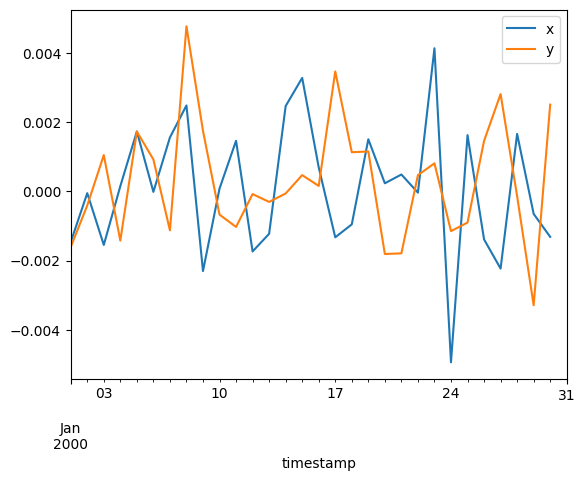

In [71]:
df[["x", "y"]].resample("24h").mean().compute().plot()

In [74]:
df.loc["2000-01-05"].compute()

,name,id,x,y
timestamp,,,,
2000-01-05 00:00:00,Hannah,996,-0.468925,-0.573377
2000-01-05 00:00:01,Sarah,1015,-0.889445,-0.981578
2000-01-05 00:00:02,Norbert,968,0.780712,-0.569005
2000-01-05 00:00:03,Alice,1000,0.600058,0.748838
2000-01-05 00:00:04,Sarah,967,0.024969,0.203337
...,...,...,...,...
2000-01-05 23:59:55,Jerry,952,-0.274259,-0.702182
2000-01-05 23:59:56,Kevin,1028,-0.947771,0.842559
2000-01-05 23:59:57,Sarah,995,-0.225012,-0.015962


In [75]:
df5 = df.set_index("name")

In [77]:
df

,name,id,x,y
npartitions=30,,,,
2000-01-01,string,int64,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [76]:
df5

,id,x,y
npartitions=26,,,
Alice,int64,float64,float64
Bob,...,...,...
...,...,...,...
Zelda,...,...,...
Zelda,...,...,...


In [80]:
df5.loc['Alice'].compute()

2024-11-05 20:28:24,730 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle c6bdc93adccf1984d6232c4175f5028f initialized by task ('shuffle-transfer-c6bdc93adccf1984d6232c4175f5028f', 1) executed on worker tcp://127.0.0.1:56691
2024-11-05 20:28:26,703 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle c6bdc93adccf1984d6232c4175f5028f deactivated due to stimulus 'task-finished-1730827706.6970544'


,id,x,y
name,,,
Alice,1031,-0.321834,0.378719
Alice,979,0.422753,0.410378
Alice,1010,0.274625,-0.861923
Alice,987,0.683946,-0.226271
Alice,1000,0.759461,0.339190
...,...,...,...
Alice,1067,-0.307539,-0.901526
Alice,992,-0.993377,0.164764
Alice,1056,-0.574253,0.566847


### Persist

In [83]:
import time

start_time = time.time()

for name in set(df5.index):
    avg = df5.loc[name, "x"].mean().compute()
    print(name, avg)
    
end_time = time.time()
end_time - start_time

2024-11-05 20:36:40,859 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 7) executed on worker tcp://127.0.0.1:56691
2024-11-05 20:36:44,162 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828204.1445472'
2024-11-05 20:36:46,712 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 28) executed on worker tcp://127.0.0.1:56691
2024-11-05 20:36:50,553 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828210.5419295'


2024-11-05 20:36:53,872 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 19) executed on worker tcp://127.0.0.1:56691
2024-11-05 20:36:57,234 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828217.2228556'
2024-11-05 20:37:00,863 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 1) executed on worker tcp://127.0.0.1:56696
2024-11-05 20:37:04,182 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828224.1769562'
2024-11-05 20:37:07,255 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde7

2024-11-05 20:37:11,047 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828231.0363708'
2024-11-05 20:37:13,627 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 9) executed on worker tcp://127.0.0.1:56696
2024-11-05 20:37:16,926 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828236.9143217'
2024-11-05 20:37:19,377 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 28) executed on worker tcp://127.0.0.1:56696


2024-11-05 20:37:22,655 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828242.641341'
2024-11-05 20:37:25,472 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 1) executed on worker tcp://127.0.0.1:56696
2024-11-05 20:37:28,819 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828248.814304'
2024-11-05 20:37:31,764 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 0) executed on worker tcp://127.0.0.1:56691


2024-11-05 20:37:34,955 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828254.9403515'
2024-11-05 20:37:37,814 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 9) executed on worker tcp://127.0.0.1:56691
2024-11-05 20:37:41,091 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828261.0832973'
2024-11-05 20:37:43,679 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 9) executed on worker tcp://127.0.0.1:56696


2024-11-05 20:37:47,154 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828267.1391673'
2024-11-05 20:37:49,981 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 28) executed on worker tcp://127.0.0.1:56691
2024-11-05 20:37:53,186 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828273.1808014'
2024-11-05 20:37:56,032 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 19) executed on worker tcp://127.0.0.1:56691


2024-11-05 20:37:59,831 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828279.8256717'

KeyboardInterrupt



In [84]:
df5 = df5.persist()

start_time = time.time()

for name in set(df5.index):
    avg = df5.loc[name, "x"].mean().compute()
    print(name, avg)
    
end_time = time.time()
end_time - start_time

2024-11-05 20:38:29,523 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a initialized by task ('shuffle-transfer-abe7e3197fde76f58d5757c621dd398a', 19) executed on worker tcp://127.0.0.1:56691
2024-11-05 20:38:34,666 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle abe7e3197fde76f58d5757c621dd398a deactivated due to stimulus 'task-finished-1730828314.6567845'


Michael 0.0007699624348290015


George 0.0015403070325601571


Laura -0.001322799364708416


Kevin 0.0004876141459673341


Wendy -0.0016756117670870725


Sarah 0.0020844408938700057


Ingrid -0.0005108024895578873


Ray -0.0013294693946174702


Alice -0.000223106553417223
Hannah -0.003701383281695935


Ursula 3.7317954545065666e-05


Patricia 0.0021408608579749004
Quinn -3.1437145318941034e-05


Victor -0.0005582802796093181


Zelda -0.000828524924776592


Yvonne 0.002490369181349892


Charlie -0.0028734764170402767


Dan 0.0009977615665861571


Norbert 0.0024754480491447186


Oliver 0.0042725312568273706


Xavier -0.0019202736405559305
Jerry -0.0010816603591938955


Edith -0.0016827781232331607


Tim -0.0011708886607065055


Frank 0.0034707391721597106
Bob 9.258766331846333e-05


39.984400510787964

### Машинное обучение в Dask

In [87]:
type(df5)

dask_expr._collection.DataFrame

In [86]:
from sklearn.linear_model import LinearRegression

partition = df5.loc['Alice']
est = LinearRegression()
est.fit(partition[["x"]].values, partition[["y"]].values)

LinearRegression()

In [90]:
def train(partition):
    if not len(partition):
        return
    est = LinearRegression()
    est.fit(partition[["x"]].values, partition[["y"]].values)
    return est

In [97]:
df6 = df5.groupby("name").apply(train).compute()

C:\Users\D\AppData\Local\Temp\ipykernel_17008\1363597630.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  df6 = df5.groupby("name").apply(train).compute()


In [98]:
df6

name
Alice       LinearRegression()
Bob         LinearRegression()
Charlie     LinearRegression()
Dan         LinearRegression()
Edith       LinearRegression()
Frank       LinearRegression()
George      LinearRegression()
Hannah      LinearRegression()
Ingrid      LinearRegression()
Jerry       LinearRegression()
Kevin       LinearRegression()
Laura       LinearRegression()
Michael     LinearRegression()
Norbert     LinearRegression()
Oliver      LinearRegression()
Patricia    LinearRegression()
Quinn       LinearRegression()
Ray         LinearRegression()
Sarah       LinearRegression()
Tim         LinearRegression()
Ursula      LinearRegression()
Victor      LinearRegression()
Wendy       LinearRegression()
Xavier      LinearRegression()
Yvonne      LinearRegression()
Zelda       LinearRegression()
dtype: object

In [101]:
list(df6.items())

[('Alice', LinearRegression()),
 ('Bob', LinearRegression()),
 ('Charlie', LinearRegression()),
 ('Dan', LinearRegression()),
 ('Edith', LinearRegression()),
 ('Frank', LinearRegression()),
 ('George', LinearRegression()),
 ('Hannah', LinearRegression()),
 ('Ingrid', LinearRegression()),
 ('Jerry', LinearRegression()),
 ('Kevin', LinearRegression()),
 ('Laura', LinearRegression()),
 ('Michael', LinearRegression()),
 ('Norbert', LinearRegression()),
 ('Oliver', LinearRegression()),
 ('Patricia', LinearRegression()),
 ('Quinn', LinearRegression()),
 ('Ray', LinearRegression()),
 ('Sarah', LinearRegression()),
 ('Tim', LinearRegression()),
 ('Ursula', LinearRegression()),
 ('Victor', LinearRegression()),
 ('Wendy', LinearRegression()),
 ('Xavier', LinearRegression()),
 ('Yvonne', LinearRegression()),
 ('Zelda', LinearRegression())]

In [99]:
list(df6.items())[:3]

[('Alice', LinearRegression()),
 ('Bob', LinearRegression()),
 ('Charlie', LinearRegression())]

In [102]:
a = ['a', 'b', 'c', 'd']
for i in range(len(a)):
    print(i, a[i])

0 a
1 b
2 c
3 d


In [103]:
for i, letter in enumerate(a):
    print(i, letter)

0 a
1 b
2 c
3 d


In [104]:
names_and_models = list(df6.items())[:3]

In [105]:
names_and_models

[('Alice', LinearRegression()),
 ('Bob', LinearRegression()),
 ('Charlie', LinearRegression())]

In [106]:
x_values = [1,2,3,4,5]
[[x] for x in x_values]

[[1], [2], [3], [4], [5]]

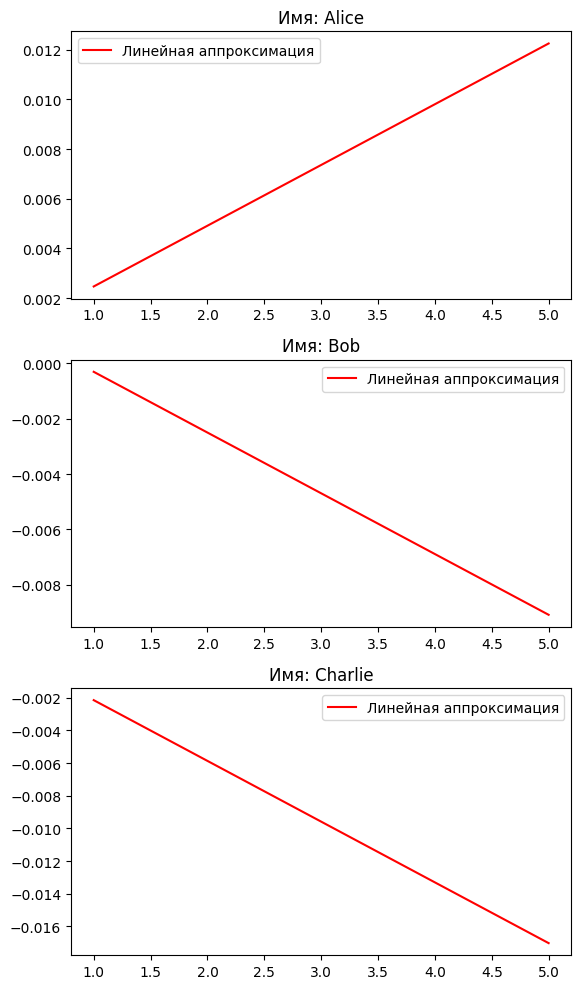

In [107]:
x_values = [1,2,3,4,5]
fig, ax = plt.subplots(3, figsize = (6,10))
names_and_models = list(df6.items())[:3]

for i, (name, model) in enumerate(names_and_models):
    y_predicted = model.predict([[x] for x in x_values])
    ax[i].plot(x_values, y_predicted , color='red', label =  "Линейная аппроксимация")
    ax[i].set_title(f"Имя: {name}")
    ax[i].legend()
    
plt.tight_layout()
plt.show()

### Parquet

In [108]:
df

,name,id,x,y
npartitions=30,,,,
2000-01-01,string,int64,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [109]:
df.to_parquet(path + "\\result.parquet")

In [110]:
df7 = dd.read_parquet(path + "\\result.parquet")

In [111]:
df7.head()

,name,id,x,y
timestamp,,,,
2000-01-01 00:00:00,Yvonne,969,-0.946827,0.961475
2000-01-01 00:00:01,Michael,980,0.546773,0.041670
2000-01-01 00:00:02,Dan,926,0.052829,-0.792164
2000-01-01 00:00:03,Victor,990,-0.104313,0.171712
2000-01-01 00:00:04,Michael,1011,0.430026,-0.614976
